
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1CMuFHluGs6slG68Tm1Ny5hLzSxz2sd7V?usp=sharing)

# **Project Title: Trump vs Biden on Twitter**


### **Group Members:**
1. Lee Jia Xian A20EC0200
2. Lee Ming Qi A20EC0064


In This Project, we are going to do a simple analysis on a big size dataset(US Election 2020 Tweets dataset) that we found from:https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets?select=hashtag_joebiden.csv. 

The US Election 2020 Tweets dataset contains a collection of tweets related to the 2020 United States presidential election, which took place on November 3, 2020. The dataset may include tweets from candidates, political parties, news organizations, and individual users discussing the election and related events. The tweets may contain text, images, and other media, and may include metadata such as the time and location the tweet was posted, the username of the account that posted the tweet, and the number of likes, retweets, and replies the tweet received. The dataset may be used for a variety of purposes, such as research on social media and political communication, analysis of public opinion and sentiment, or tracking the spread of information and misinformation online.

Columns are as follows:


1.   created_at: Date and time of tweet creation
2.   tweet_id: Unique ID of the tweet
3. tweet: Full tweet text
4. likes: Number of likes
5. retweet_count: Number of retweets
6. source: Utility used to post tweet
7. user_id: User ID of tweet creator
8. user_name: Username of tweet creator
9. user_screen_name: Screen name of tweet creator
10. user_description: Description of self by tweet creator
11. user_join_date: Join date of tweet creator
12. user_followers_count: Followers count on tweet creator
13. user_location: Location given on tweet creator's profile
14. lat: Latitude parsed from user_location
15. long: Longitude parsed from user_location
16. city: City parsed from user_location
17. country: Country parsed from user_location
18. state: State parsed from user_location
19. state_code: State code parsed from user_location
20. collected_at: Date and time tweet data was mined from twitter

In this case, we wish to analysis the connections between users in the dataset about how information was spreading on social media(Twitter).  

The technique/tool used we used in this Big data analysis including:


*   Pandas
*   Numpy
*   Random
* seaborn
* matplotlib.pyplo
* plotly.express
* folium








## Downloading the Dataset


For our case, we decided to use the API token of Kaggle to download the dataset file.To obtain an API token for Kaggle, you will need to have a Kaggle account and be logged in. Then, follow these steps:

1. Go to the Kaggle API documentation page (https://www.kaggle.com/docs/api).

2. Click the "Create New API Token" button.

3. A file called "kaggle.json" will be downloaded to your computer. This file contains your API token and other information needed to access the Kaggle API.

Once you have your API token, you can run the code below and place it in the appropriate location. Now, you can use the Kaggle API to download dataset the will be use in this project.

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's begin by downloading the data, and listing the files within the dataset. Remember to place the API token that you have download just now for this operation to downlaod the dataset file.

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/download?datasetVersionNumber=19")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: leejiaxian
Your Kaggle Key: ··········


100%|██████████| 353M/353M [00:04<00:00, 76.9MB/s]


The dataset has been downloaded and extracted.

Next step

## Data Preparation and Cleaning





> Instructions:

1. Read the dataset into a data frame using Pandas
2. Explore the number of rows & columns, data type of each column, the number of non-missing values, and the memory usage of the object using info().
3. Handle the missing, incorrect and invalid data
4. Create an additional column for our dataset for analysis

In [ ]:
import pandas as pd
import random as rd

In [ ]:
trump_df = pd.read_csv('/content/us-election-2020-tweets/hashtag_donaldtrump.csv' , lineterminator='\n')
biden_df = pd.read_csv('/content/us-election-2020-tweets/hashtag_joebiden.csv',  lineterminator='\n')

#Create an additional column to identify the candidate according the dataset that we read.
trump_df["Candidate"] = "TRUMP"
biden_df["Candidate"] = "BIDEN"
trump_df['country'].replace({"United States of America" : "US", "United States" : "US"}, inplace=True)
biden_df['country'].replace({"United States of America" : "US", "United States" : "US"}, inplace=True)
df = pd.concat([trump_df, biden_df])
df = df.sort_values(by='created_at', ignore_index=True)
df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,BIDEN
2,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
3,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
4,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747800,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,TRUMP
1747801,2020-11-08 23:59:55,1.325589e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,4.519791e+08,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",...,✔ Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,TRUMP
1747802,2020-11-08 23:59:56,1.325589e+18,@nbcbayarea Who doesn’t like dogs or any kind ...,1.0,1.0,Twitter for iPhone,1.182639e+08,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",...,United States,39.783730,-100.445882,NaN,US,North America,NaN,NaN,2020-11-09 17:46:06.939099,TRUMP
1747803,2020-11-08 23:59:57,1.325589e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,1.148479e+08,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,...,Deutschland,51.083420,10.423447,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,BIDEN


In [ ]:
#use info() method displays the data type of each column, the number of non-missing values, and the memory usage of the object.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747805 entries, 0 to 1747804
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   created_at            object 
 1   tweet_id              float64
 2   tweet                 object 
 3   likes                 float64
 4   retweet_count         float64
 5   source                object 
 6   user_id               float64
 7   user_name             object 
 8   user_screen_name      object 
 9   user_description      object 
 10  user_join_date        object 
 11  user_followers_count  float64
 12  user_location         object 
 13  lat                   float64
 14  long                  float64
 15  city                  object 
 16  country               object 
 17  continent             object 
 18  state                 object 
 19  state_code            object 
 20  collected_at          object 
 21  Candidate             object 
dtypes: float64(7), object(15)
memory usage: 29

In [ ]:
#To check the total number of null value in each column
df.isnull().sum()

created_at                    0
tweet_id                      0
tweet                         0
likes                         0
retweet_count                 0
source                     1589
user_id                       0
user_name                    34
user_screen_name              0
user_description         183272
user_join_date                0
user_followers_count          0
user_location            528744
lat                      946793
long                     946793
city                    1333746
country                  951278
continent                951243
state                   1166990
state_code              1202771
collected_at                  0
Candidate                     0
dtype: int64

In [ ]:
#TO calculate the percentage of missing values in each column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, 
                         keys=['Total', 'Percentage'])
missing_data





,Total,Percentage
city,1333746,0.763098
state_code,1202771,0.688161
state,1166990,0.667689
country,951278,0.544270
continent,951243,0.544250
lat,946793,0.541704
long,946793,0.541704
user_location,528744,0.302519
user_description,183272,0.104858
source,1589,0.000909


In [ ]:
#Drop the column city, state_code and state. This is because the percentage of missing values of these column is too high.
#Otherwise, it will increase the difficulty for us to hadle the data. 
df=df.drop(['city', 'state_code','state'], axis=1)

In [ ]:
#Drop the rows the contain null value
df=df.dropna()

In [ ]:
#Check is there still any null value in the data frame.
df.isnull().sum()

created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_name               0
user_screen_name        0
user_description        0
user_join_date          0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
continent               0
state                   0
state_code              0
collected_at            0
Candidate               0
dtype: int64

In [ ]:
# Now, we are done cleaning the data
df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,country,continent,collected_at,Candidate
3,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,US,North America,2020-10-21 00:00:00.746433060,TRUMP
5,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,US,North America,2020-10-21 00:00:01.492866121,TRUMP
17,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",2009-02-02 23:08:28,1397.0,"Chicago, Illinois",41.875562,-87.624421,US,North America,2020-10-21 00:00:03.106963698,BIDEN
18,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",2009-02-02 23:08:28,1396.0,"Chicago, Illinois",41.875562,-87.624421,US,North America,2020-10-21 00:00:04.105381834,TRUMP
19,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",2020-03-26 23:14:28,496.0,"San Diego, CA",32.717421,-117.162771,US,North America,2020-10-21 00:00:04.478598364,TRUMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747758,2020-11-08 23:58:51,1.325589e+18,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,4.835231e+07,"Linda ""I Voted for Biden"" Kenney Baden",KenneyBaden,"TrialLawyer https://t.co/1C0kKESSUC, Played by...",2009-06-18 13:41:48,3024.0,"New York, USA",40.712728,-74.006015,US,North America,2020-11-09 17:47:55.833725,TRUMP
1747759,2020-11-08 23:58:51,1.325589e+18,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,4.835231e+07,"Linda ""I Voted for Biden"" Kenney Baden",KenneyBaden,"TrialLawyer https://t.co/1C0kKESSUC, Played by...",2009-06-18 13:41:48,3024.0,"New York, USA",40.712728,-74.006015,US,North America,2020-11-09 18:26:04.501425,BIDEN
1747761,2020-11-08 23:58:54,1.325589e+18,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,5.008862e+08,Ken Noble😎,knoble62,Believe in live & let live. Tweets are persona...,2012-02-23 15:31:47,453.0,"West London, UK",51.532568,-0.480700,United Kingdom,Europe,2020-11-09 17:47:55.944382,TRUMP
1747774,2020-11-08 23:59:16,1.325589e+18,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,3.772296e+08,Tim Welch,TimFWelch,transportation nerd; data geek.\nsenior lectur...,2011-09-21 07:13:23,444.0,"Auckland, NZ",-36.852095,174.763180,New Zealand,Oceania,2020-11-09 18:32:45.760347,BIDEN


In [ ]:
#Take only 40% of the data in the dataset for analysis
df_sample=df.sample(frac=0.40)
df_sample

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
648913,2020-10-31 23:35:34,1.322684e+18,@realDonaldTrump Anti-Trump? PLEASE VOTE #Make...,0.0,0.0,Twitter for iPhone,7.827965e+17,THCPetDoctor,THCPetDoctor,"I represent a group of 240+ veterinarians, MDs...",...,"Berkeley, CA",37.870839,-122.272864,Berkeley,US,North America,California,CA,2020-11-01 10:51:50.855522,TRUMP
195749,2020-10-21 01:03:09,1.318719e+18,@jacobsoboroff @JuliaEAinsley An absolute disg...,9.0,6.0,Twitter Web App,8.742585e+08,Jonathan Greenberg,JournalistJG,Award-winning public interest investigative jo...,...,"New York, NY",40.712728,-74.006015,New York,US,North America,New York,NY,2020-10-27 18:31:51.727098,BIDEN
1061200,2020-11-04 19:11:31,1.324067e+18,#Election2020 #Biden #ElectionNight https://t....,0.0,0.0,Twitter for Android,2.278419e+09,lynn Sirrah,LSirrah,"#voteblue #TraitorTrump #joebiden2020,Despise ...",...,"New York, USA",40.712728,-74.006015,New York,US,North America,New York,NY,2020-11-05 12:51:47.197195,BIDEN
149049,2020-10-19 16:17:26,1.318225e+18,@realDonaldTrump Anti-Trump? PLEASE VOTE #Make...,1.0,0.0,Twitter for iPhone,7.827965e+17,THCPetDoctor,THCPetDoctor,"I represent a group of 220+ veterinarians, MDs...",...,"Berkeley, CA",37.870839,-122.272864,Berkeley,US,North America,California,CA,2020-10-21 09:16:39.520520429,TRUMP
1328126,2020-11-06 17:15:41,1.324762e+18,"Still not calling these states, or the preside...",55.0,19.0,Twitter Web App,2.095488e+07,SovernNation,SovernNation,Political Reporter @KCBSRadio. Ex-NYT & AP. Lo...,...,"Oakland, California",37.804456,-122.271356,Oakland,US,North America,California,CA,2020-11-07 11:40:48.349774,BIDEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75455,2020-10-16 23:37:47,1.317248e+18,#indianamericans will think about #kashmir bef...,0.0,0.0,Twitter for iPhone,8.816043e+08,naashonomics,naashonomics,"life is a series of now moments, #startup #sto...",...,San Jose,37.336191,-121.890583,San Jose,US,North America,California,CA,2020-10-21 04:30:40.517319579,TRUMP
228824,2020-10-22 00:34:52,1.319075e+18,"""The Laptop From Hell""\n\nDonald Trump on Joe ...",1.0,0.0,Twitter Web App,1.037467e+18,Josey #2A 🇺🇸✝️☘️🇮🇪™️,716n702,It is often that a person’s mouth broke his no...,...,"Buffalo, NY",42.886717,-78.878392,Buffalo,US,North America,New York,NY,2020-10-27 17:58:10.800249,TRUMP
1457340,2020-11-07 17:03:04,1.325122e+18,I wouldn’t put it past him #DonaldTrump to go ...,1.0,0.0,Twitter for iPhone,5.893212e+07,SaBrina,beaniegurl47,"Follow Me on Instagram,SnapChat,Facebook.(bean...",...,"Atlanta, GA",33.749099,-84.390185,Atlanta,US,North America,Georgia,GA,2020-11-08 10:42:12.469429,TRUMP
1044017,2020-11-04 17:16:22,1.324038e+18,That's what Postal vote counting can do and wh...,1.0,0.0,Twitter for Android,2.754543e+08,Mike,Michae11O,Retired MD #Artist #Writer #Photographer #Dad....,...,"West Country, UK",53.906859,-1.491459,Leeds,United Kingdom,Europe,England,ENG,2020-11-05 12:04:45.654280,TRUMP


# **Exploratory Analysis and Visualization**





> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis



# Graph 1:Bar chart about the The number of Tweets about Biden vs Trump

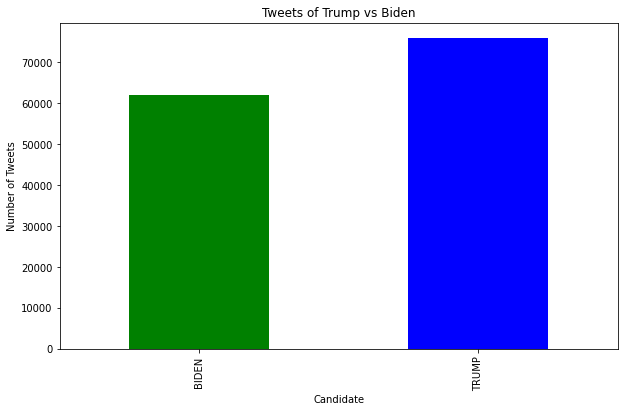

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt



# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Tweets of Trump vs Biden")


# Add label for vertical axis
plt.ylabel("Number of Tweets")

# Bar chart showing the total number of tweets grouping with candidate
df_groups = df_sample.groupby(['Candidate'])['tweet'].count()

#Table Settings
df_groups.plot(kind='bar',color = ['green', 'blue'])



# Graph 2: Pie Chart about the Top 5 source to tweet about election(Biden vs Trump)

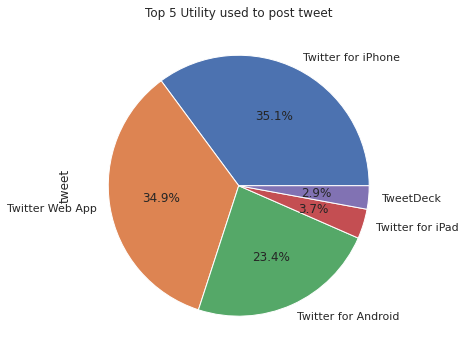

In [ ]:
import matplotlib.pyplot as plt


# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Top 5 Utility used to post tweet")


# Add label for vertical axis


# Bar chart showing the total number of tweets grouping with candidate
df_source = df_sample.groupby(['source'])['tweet'].count().sort_values(ascending=False).head(5)

#Table Settings
df_source.plot(kind='pie', autopct='%1.1f%%')



# Graph 3: Bar graph by country of user tweets about the election (Trump vs. Biden)

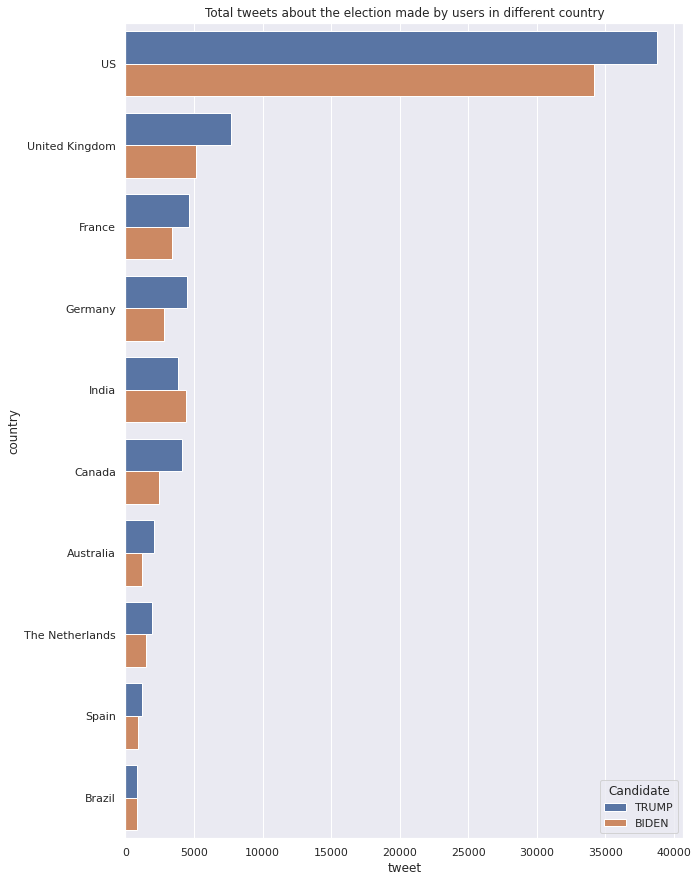

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('dark')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#FFE5B4'

top_countries = df_sample.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

df_country = df_sample.groupby(['country','Candidate'])['tweet'].count().reset_index()


df_country = df_country.sort_values(by='tweet', ascending=False)
df_country = df_country[df_country['country'].isin(top_countries)]

# Set the width and height of the figure
sns.set(rc={'figure.figsize':(10,15)})

# Add title
plt.title("Total tweets about the election made by users in different country")
# Add label for vertical axis
plt.ylabel("Country")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(data=df_country ,x='tweet',y='country',hue='Candidate')





# Graph 4: Trend line about the tweets of election (Biden Vs Trump)

In [ ]:
import plotly.express as px

df_time = df_sample
df_time

def get_day(timestamp):
    day = timestamp.split(' ')[0]
    return day

df_time['day'] = df_time['created_at'].apply(get_day)
time_df = df_time.groupby(['Candidate', 'day'])['tweet'].count().reset_index()

fig = px.line(time_df, x='day', y='tweet', color='Candidate')

fig.show()




# Graph 5: Map shows the location of users that tweet about the election(Trump vs Biden)

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



**Q1: Which candidate have the higher count of tweets?.**


[Graph 1](#scrollTo=Fv4NPHasVJJ7&line=3&uniqifier=1)

 **Answer:
Trump has the higher number of tweets count compare to Biden.**

Library used:
1. Pandas:  For data manipulation to count the total number of tweets and group them by candidate column.
2. matplotlib.pyplot : Provides functions for creating and customizing visualizations of data

**Q2: What is the top 5 sources of the account's Tweet?**

[Graph 2](#scrollTo=hW1sBqC0HOR1&line=1&uniqifier=1)


 **Answer:**

 Top 1: Twitter For iPhone

 Top 2: Twitter Web App

 Top 3: Twitter for Andriod

 Top 4: Twitter for Ipad

 Top 5: TweetDeck

Library used:
1. Pandas:  For data manipulation to count the total number of tweets and group them by source column.
2. matplotlib.pyplot : Provides functions for creating and customizing visualizations of data



**Q3: What is the top 10 countries that tweet the most about the election (Trump vs Biden)?**

[Graph 3](#scrollTo=tLNLw0EOVJJ8&line=3&uniqifier=1)


 **Answer:**

 Top 1: US

 Top 2: United Kingdom 

 Top 3: France

 Top 4: Germany

 Top 5: India

 Top 6: Canada

 Top 7: Australia

 Top 8: The Netherlands

 Top 9: Spain

 Top 10: Brazil

Library used:
1. Pandas:  For data manipulation to count the total number of tweets and group them by column country, candidate.
2. matplotlib.pyplot : Provides functions for creating and customizing visualizations of data
3. Seaborn: Used to plot the bar graph

**Q4: What is trend of the number of tweets about the candidate during the eleciton?**

[Graph 4](#scrollTo=MSxV558FJWG1&line=1&uniqifier=1)


**Answer:
According to the graph, the trend of the number of tweets about Trump is long-term winning and having a down trend and starting to lose Biden at Nov 6**



Library used:
1. Pandas:  For data manipulation to count the total number of tweets and group them respective day and candidate.
2. plotly.express : provides functions for creating interactive visualizations of data using a high-level interface to plot the trend line.

**Q5: What is the location of users that tweet about the election(Trump vs Biden)?**




**Answer:**
[Graph 5](#scrollTo=nt_CVhi-VJJ8&line=3&uniqifier=1)



Library used:
1. Pandas:  For data manipulation to get the longitude and latitude of the location
2. Folium:To visualize geographical data on a map, customize the map with various features, and add markers to the map.

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

Inferences ：

1. The total number of tweets about Trump is higher than that of Biden. That doesn't mean Trump won the election, it just means Trump's popularity is better than Biden's, whether positive or negative.

2. The highest number of citizens that tweets about this election of course is United States and follow by United Kingdom. Then we still can see in graph 2 that the highest source used to tweet is Iphone. This show that the Apple Iphone is the most widely used smartphone in United States. 

3. From the trend line about number of tweets (Biden vs Trump), we can notice that Biden’s tweet count has made a come back and even doubled that of Trump on November 7th.. This is because Joe Biden was declared the winner of the election, and he was inaugurated as the 46th President of the United States.

Conclusion:
In conclusion, the 2020 presidential election in the United States was a closely contested race between Donald Trump and Joe Biden. This is consistent with all the data visualizations showing that there is not much difference in the number of tweets between the two. But in the end, Joe Biden was ultimately declared the winner of the election and was inaugurated as the 46th President of the United States on January 20, 2021. There were legal challenges and allegations of voter fraud made by the Trump campaign, but these allegations were ultimately dismissed by the courts and the results of the election were upheld. It is important to respect the outcome of the election and to follow the established legal processes for resolving any disputes or challenges.

## References and Future Work

References: https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets?select=hashtag_joebiden.csv